In [18]:
import numpy as np
from matplotlib import pyplot as plt

Suppose you have a medical test with a two-sided error of 5%: if the test is positive there's a 5% chance that you are still healthy, and if the test is negative there's a 5% chance that you are still sick. Suppose also that the disease has 1% prevalence (prior probability).

In [19]:
# P(sick) = 0.01
# P(not-sick) = 0.99
prior_sick = 0.01
prior_not_sick = 1 - prior_sick

In [20]:
# P(sick | positive) = posterior

# P(positive | sick) = 0.95
# P(positive | not-sick) = 0.05
# P(negative | not-sick) = 0.95
# P(negative | sick) = 0.05
likelihood_positive_sick = 0.95
likelihood_positive_not_sick = 1 - likelihood_positive_sick

Q: A person taken uniformly from the population has taken the test, and the test is positive (i.e., it says the person is sick). What is the probability that the person is actually sick?


In [21]:
# P(positive) = P(positive and sick) + P(positive and not-sick)
positive_and_sick_proba = likelihood_positive_sick * prior_sick
positive_and_not_sick_proba = likelihood_positive_not_sick * prior_not_sick
evidence_positive = positive_and_sick_proba + positive_and_not_sick_proba

print(
    f"P(positive and sick) = {positive_and_sick_proba}\nP(positive and not-sick) = {positive_and_not_sick_proba}\nEvidence = {evidence_positive}"
)

P(positive and sick) = 0.0095
P(positive and not-sick) = 0.049500000000000044
Evidence = 0.059000000000000045


What is the probability that the person is actually sick?

In [22]:
# P(sick | positive) = probability of the person is actually sick given that the test is postive
posterior = (likelihood_positive_sick * prior_sick) / evidence_positive

posterior

0.16101694915254225

Q: The doctors think that the results of item 1 are unacceptable and want to improve the test. They can concentrate either on reducing false positives (errors when the test is positive but the person is healthy) or on reducing false negatives (errors when the test is negative but the person is sick). Which should they choose?

In [23]:
# we have two tunable parameters
# P(positive | not-sick) = 0.05         False Positive
# P(negative | sick) = 0.05             False Negative

fpr = 0.05
fnr = 0.05

# reducing which one outperforms than the other?

# we normalize the posterior with evidence
# P(positive) = P(positive and sick) + P(positive and not-sick)
# P(positive) = P(positive | sick) . P(sick) + P(positive | not-sick) . P(not-sick)


# P(positive | sick) = 1 - P(negative | sick)
# P(positive | not-sick)

# P(positive) = (1 - P(negative | sick)) . P(sick) + P(positive | not-sick) . P(not-sick)
#               0.95 * 0.01                        + 0.05 * 0.99

# intuition: reducing the right side P(positive | not-sick) would improve the posterior
print(
    f"Contribution of False Positive = {positive_and_not_sick_proba / positive_and_sick_proba:.2f}"
)

Contribution of False Positive = 5.21


To illustrate the answer, plot graphs of the answer to item 1 as a function of the false negative rate and false positive rate.

In [24]:
def calculate_posterior(prior_sick, fpr, fnr):
    tpr = 1 - fnr
    positive_and_sick = tpr * prior_sick
    positive_and_not_sick = fpr * prior_not_sick
    evidence = positive_and_sick + positive_and_not_sick
    posterior = positive_and_sick / evidence
    return posterior, positive_and_sick, positive_and_not_sick

In [25]:
base_posterior, base_true_pos, base_false_pos = calculate_posterior(
    prior_sick, fpr, fnr
)

base_posterior, base_true_pos, base_false_pos

(0.16101694915254236, 0.0095, 0.0495)

In [26]:
# reduce by some amount
delta = 0.02

# fixed fnr
improved_fpr_posterior, _, _ = calculate_posterior(prior_sick, fpr - delta, fnr)

# fixed fpr
improved_fnr_posterior, _, _ = calculate_posterior(prior_sick, fpr, fnr - delta)

fpr_range = np.linspace(0.01, 0.15, num=100)
ppv_vs_fpr = [calculate_posterior(prior_sick, f, fnr)[0] for f in fpr_range]

fnr_range = np.linspace(0.001, 0.15, 100)
ppv_vs_fnr = [calculate_posterior(prior_sick, fpr, f)[0] for f in fnr_range]

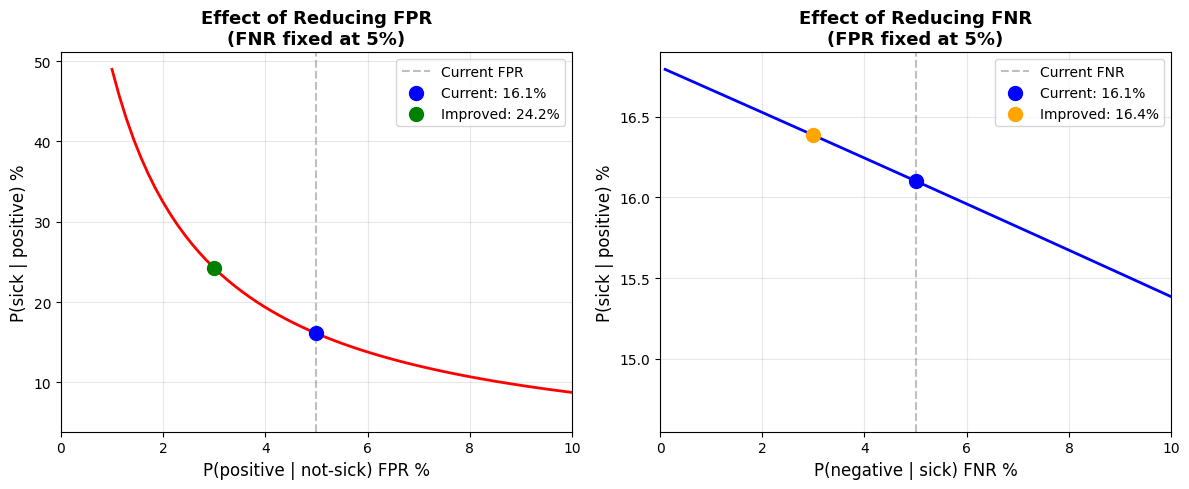

In [29]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr_range * 100, np.array(ppv_vs_fpr) * 100, "r-", linewidth=2)
plt.axvline(fpr * 100, color="gray", linestyle="--", alpha=0.5, label="Current FPR")
plt.scatter(
    [fpr * 100],
    [base_posterior * 100],
    s=100,
    c="blue",
    zorder=5,
    label=f"Current: {base_posterior * 100:.1f}%",
)
plt.scatter(
    [(fpr - delta) * 100],
    [improved_fpr_posterior * 100],
    s=100,
    c="green",
    zorder=5,
    label=f"Improved: {improved_fpr_posterior * 100:.1f}%",
)
plt.xlabel("P(positive | not-sick) FPR %", fontsize=12)
plt.ylabel("P(sick | positive) %", fontsize=12)
plt.title("Effect of Reducing FPR\n(FNR fixed at 5%)", fontsize=13, fontweight="bold")
plt.grid(alpha=0.3)
plt.legend()
plt.xlim(0, 10)

plt.subplot(1, 2, 2)
plt.plot(fnr_range * 100, np.array(ppv_vs_fnr) * 100, "b-", linewidth=2)
plt.axvline(fnr * 100, color="gray", linestyle="--", alpha=0.5, label="Current FNR")
plt.scatter(
    [fnr * 100],
    [base_posterior * 100],
    s=100,
    c="blue",
    zorder=5,
    label=f"Current: {base_posterior * 100:.1f}%",
)
plt.scatter(
    [(fnr - delta) * 100],
    [improved_fnr_posterior * 100],
    s=100,
    c="orange",
    zorder=5,
    label=f"Improved: {improved_fnr_posterior * 100:.1f}%",
)
plt.xlabel("P(negative | sick) FNR %", fontsize=12)
plt.ylabel("P(sick | positive) %", fontsize=12)
plt.title("Effect of Reducing FNR\n(FPR fixed at 5%)", fontsize=13, fontweight="bold")
plt.grid(alpha=0.3)
plt.legend()
plt.xlim(0, 10)

plt.tight_layout()
plt.show()

Conclusion: Prioritize reducing False Positives\
P(positive | not-sick)